# GTZAN/Beat This Analysis


### Downloading the annotations, audio, and evaluation results

In [2]:
from IPython.display import Audio, display

In [3]:
!git clone https://github.com/CPJKU/beat_this_annotations/

Cloning into 'beat_this_annotations'...
remote: Enumerating objects: 5506, done.
remote: Counting objects: 100% (5506/5506), done.
remote: Compressing objects: 100% (5380/5380), done.
remote: Total 5506 (delta 115), reused 5489 (delta 106), pack-reused 0 (from 0)
Receiving objects: 100% (5506/5506), 5.59 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [9]:
!git clone https://github.com/smilo7/more-beats-for-this/

Cloning into 'more-beats-for-this'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 33.83 KiB | 567.00 KiB/s, done.


In [4]:
!kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [00:14<00:00, 93.7MB/s]
100% 1.21G/1.21G [00:14<00:00, 92.6MB/s]


In [5]:
!unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [6]:
gtzan_beats_path = "/content/beat_this_annotations/gtzan/annotations/beats/"
gtzan_audio_path = "/content/Data/genres_original/"

In [32]:
import librosa
import numpy as np

def read_beats(beats_file):
  """Reads beat positions and beat numbers from a .beats file.

  Args:
    beats_file: Path to the .beats file.

  Returns:
    A tuple containing two lists: beat positions in seconds and beat numbers.
  """
  beat_times = []
  beat_numbers = []
  with open(beats_file, 'r') as f:
    for line in f:
      time, number = line.strip().split('\t')
      beat_times.append(float(time))
      beat_numbers.append(int(number))
  return beat_times, beat_numbers

def generate_click_track(beat_times, sr):
    """Generates a click track audio signal.

    Args:
        beat_times (list): List of beat times in seconds.
        sr (int): Sample rate of the audio.

    Returns:
        numpy.ndarray: Click track audio signal.
    """
    clicks = librosa.clicks(times=beat_times, sr=sr)
    return clicks

def add_click_track(audio, click_track):
    """Adds a click track to an audio signal, ensuring equal lengths.

    Args:
        audio (numpy.ndarray): Original audio signal.
        click_track (numpy.ndarray): Click track audio signal.

    Returns:
        numpy.ndarray: Audio signal with added click track.
    """
    min_len = min(len(audio), len(click_track))
    audio = audio[:min_len]
    click_track = click_track[:min_len]
    mixed_audio = audio + 0.5 * click_track
    return mixed_audio

def sonify_beats(file_name, beats_path):
  beats_path = gtzan_beats_path + beats_path
  beat_times, beat_numbers = read_beats(beats_path)
  audio_path = gtzan_audio_path + file_name
  y, sr = librosa.load(audio_path)
  click_track = generate_click_track(beat_times, sr)
  sonified = add_click_track(y, click_track)
  return Audio(sonified, rate=sr)

### Cleaning the Evaluation Metrics metadata

In [33]:
# prompt: open the csv from this file in pandas and sort by the lowest f1 scores /content/more-beats-for-this/beat-this-results-on-test/final-model-track-metrics.csv

import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/more-beats-for-this/beat-this-results-on-test/final-model-track-metrics.csv')
# Split the 'Piece' column into 'Genre' and 'Track'
df[['Genre', 'Track']] = df['Piece'].str.extract(r'gtzan_([a-z]+)_(\d{5})', expand=True)
# Create the 'file_name' column
df['file_name'] = df['Genre'] + '/' + df['Genre'] + '.' + df['Track'] + '.wav'
df['beats_path'] = 'gtzan_' + df['Genre'] + '_' + df['Track'] + '.beats'
df.sort_values(by="F-measure_beat", ascending=True)




,Piece,Dataset,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat,Genre,Track,file_name,beats_path
36,gtzan/gtzan_blues_00036/track.npy,gtzan,0.000000,0.265311,0.019608,0.686275,0.000000,0.000643,1.000000,1.000000,blues,00036,blues/blues.00036.wav,gtzan_blues_00036.beats
595,gtzan/gtzan_metal_00001/track.npy,gtzan,0.000000,0.477354,0.000000,0.984615,0.000000,0.000011,0.941176,0.941176,metal,00001,metal/metal.00001.wav,gtzan_metal_00001.beats
30,gtzan/gtzan_blues_00030/track.npy,gtzan,0.000000,0.177261,0.000000,0.826087,0.000000,0.000072,1.000000,1.000000,blues,00030,blues/blues.00030.wav,gtzan_blues_00030.beats
127,gtzan/gtzan_classical_00027/track.npy,gtzan,0.000000,0.232456,0.000000,0.700000,0.000000,0.000103,0.166667,0.166667,classical,00027,classical/classical.00027.wav,gtzan_classical_00027.beats
598,gtzan/gtzan_metal_00004/track.npy,gtzan,0.066116,0.177939,0.015625,0.515625,0.000000,0.010143,0.450000,0.450000,metal,00004,metal/metal.00004.wav,gtzan_metal_00004.beats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,gtzan/gtzan_country_00095/track.npy,gtzan,1.000000,0.972464,1.000000,1.000000,1.000000,0.944914,1.000000,1.000000,country,00095,country/country.00095.wav,gtzan_country_00095.beats
296,gtzan/gtzan_country_00096/track.npy,gtzan,1.000000,0.975215,1.000000,1.000000,1.000000,0.976707,1.000000,1.000000,country,00096,country/country.00096.wav,gtzan_country_00096.beats
596,gtzan/gtzan_metal_00002/track.npy,gtzan,1.000000,0.917365,1.000000,1.000000,1.000000,0.882595,1.000000,1.000000,metal,00002,metal/metal.00002.wav,gtzan_metal_00002.beats
279,gtzan/gtzan_country_00079/track.npy,gtzan,1.000000,0.897189,1.000000,1.000000,1.000000,0.881546,1.000000,1.000000,country,00079,country/country.00079.wav,gtzan_country_00079.beats


In [56]:
# Group the DataFrame by 'Genre' and calculate the mean of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
genre_averages = df.groupby('Genre')[numerical_cols].mean()

genre_averages


,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat
Genre,,,,,,,,
blues,0.820726,0.751740,0.678313,0.833696,0.625574,0.596441,0.482858,0.629219
classical,0.659634,0.539884,0.504801,0.643550,0.497421,0.424370,0.272608,0.464235
country,0.932357,0.874040,0.830779,0.931698,0.900663,0.848956,0.753707,0.876498
disco,0.952378,0.873389,0.937326,0.960397,0.923985,0.854275,0.884837,0.943934
hiphop,0.970349,0.902479,0.950219,0.972860,0.876315,0.840231,0.822211,0.905002
jazz,0.859879,0.777914,0.714358,0.874272,0.729795,0.670502,0.594003,0.716522
metal,0.874099,0.835951,0.743685,0.868238,0.757007,0.721884,0.650077,0.759846
pop,0.952745,0.905277,0.909105,0.964948,0.934563,0.892731,0.884621,0.944809
reggae,0.916565,0.879474,0.770475,0.953756,0.701094,0.732426,0.490899,0.760828


In [ ]:
# Display the first 15 rows sorted by 'F-measure_beat'
for index, row in df.sort_values(by="F-measure_beat", ascending=True).head(25).iterrows():
    file_name = row['file_name']
    beats_path = row['beats_path']
    f1_score = row['F-measure_beat']
    print(f"File Name: {file_name}, Beats Path: {beats_path}, F-1 Score: {f1_score}")
    display(sonify_beats(file_name, beats_path))


## Running Beat This! on fail cases

In [36]:
# install the beat_this package
!pip install https://github.com/CPJKU/beat_this/archive/main.zip

# load the Python class for beat tracking
from beat_this.inference import File2Beats
from beat_this.inference import File2File

     / 5.0 MB 7.6 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00
  Created wheel for beat-this: filename=beat_this-0.1-py3-none-any.whl size=39306 sha256=eb0f03dde53461d99cffe18542e461c3a1782b6584

In [39]:
import soundfile as sf

def sonify_predicted_beat(audio_path):
  audio_path = gtzan_audio_path + audio_path
  audio, sr = sf.read(audio_path)
  # make it mono if stereo
  if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)
  file2beats = File2Beats(checkpoint_path="final0", dbn=False)
  beats, downbeats = file2beats(audio_path)
  beats = [b for b in beats if b not in downbeats]
  audio_beat = librosa.clicks(times = beats, sr=sr, click_freq=1000, length=len(audio))
  audio_downbeat = librosa.clicks(times = downbeats, sr=sr, click_freq=1500, length=len(audio))
  return Audio(audio + 0.5 * (audio_beat + audio_downbeat), rate=sr)

In [ ]:
for index, row in df.sort_values(by="F-measure_beat", ascending=True).head(25).iterrows():
    file_name = row['file_name']
    beats_path = row['beats_path']
    f1_score = row['F-measure_beat']
    print("---------------")
    print(f"File Name: {file_name}, Beats Path: {beats_path}, F-1 Score: {f1_score}")
    print("Annotated Beat:")
    display(sonify_beats(file_name, beats_path))
    print("Predicted Beat:")
    display(sonify_predicted_beat(file_name))
    print("---------------")

### Plotting predicted vs. estimated beats

In [48]:
def get_predicted_beat(audio_path):
  audio_path = gtzan_audio_path + audio_path
  audio, sr = sf.read(audio_path)
  # make it mono if stereo
  if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)
  file2beats = File2Beats(checkpoint_path="final0", dbn=False)
  beats, downbeats = file2beats(audio_path)
  return audio, beats, downbeats

def get_annotated_beat(audio_path, beats_path):
  audio_path = gtzan_audio_path + audio_path
  beats_path = gtzan_beats_path + beats_path
  beat_times, beat_numbers = read_beats(beats_path)
  audio, sr = sf.read(audio_path)
  # make it mono if stereo
  if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)
  return audio, beat_times

In [51]:
import librosa.display
import matplotlib.pyplot as plt

def plot_predicted_beat(audio_path):
    """Plots the predicted beats and downbeats on top of the audio's waveform.

    Args:
        audio_path (str): Path to the audio file.
    """

    audio, beats, downbeats = get_predicted_beat(audio_path)
    sr = librosa.get_samplerate(gtzan_audio_path + audio_path) # Get sample rate

    # Plot the waveform
    plt.figure(figsize=(24, 4))
    librosa.display.waveshow(audio, sr=sr, alpha=0.5)

    # Plot the beats and downbeats
    plt.vlines(beats, ymin=-1, ymax=1, color='r', linestyles='dashed', label='Beats')
    plt.vlines(downbeats, ymin=-1, ymax=1, color='b', linestyles='-', label='Downbeats')

    plt.title('Predicted Beats and Downbeats')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def plot_annotated_beat(audio_path, beats_path):
    """Plots the annotated beats on top of the audio's waveform.

    Args:
        audio_path (str): Path to the audio file.
        beats_path (str): Path to the beats annotation file.
    """

    audio, beat_times = get_annotated_beat(audio_path, beats_path)
    sr = librosa.get_samplerate(gtzan_audio_path + audio_path)  # Get sample rate

    # Plot the waveform
    plt.figure(figsize=(24, 4))
    librosa.display.waveshow(audio, sr=sr, alpha=0.5)

    # Plot the beats
    plt.vlines(beat_times, ymin=-1, ymax=1, color='g', linestyles='-', label='Beats')

    plt.title('Annotated Beats')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

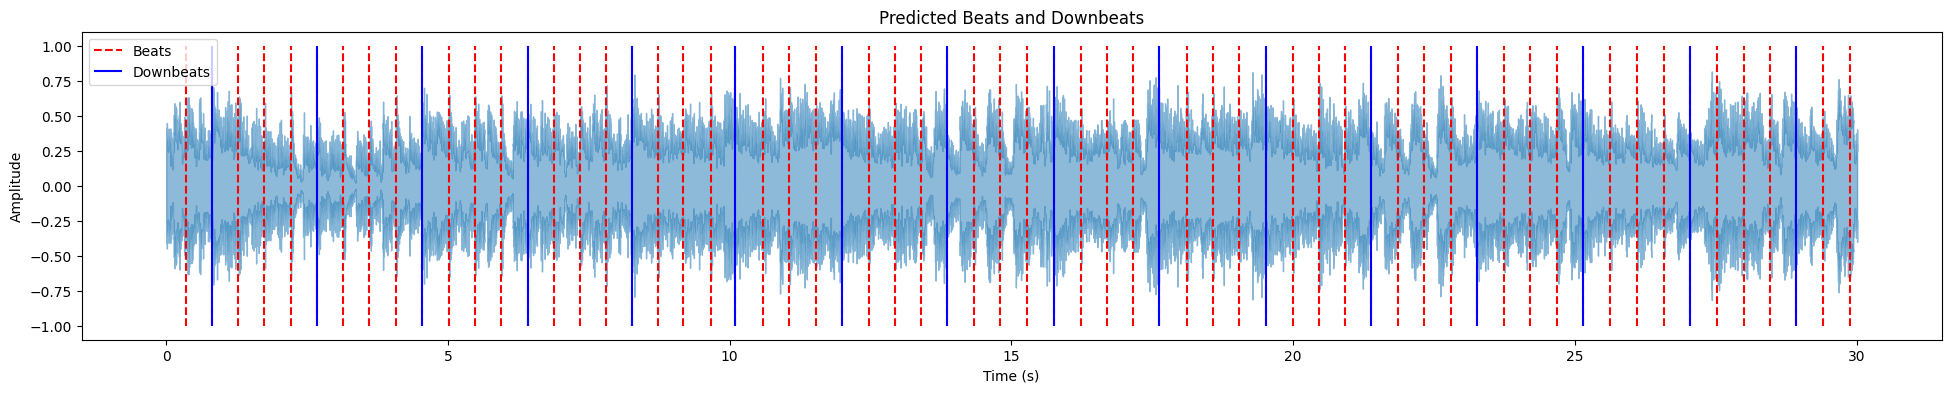

In [52]:
plot_predicted_beat("disco/disco.00033.wav")

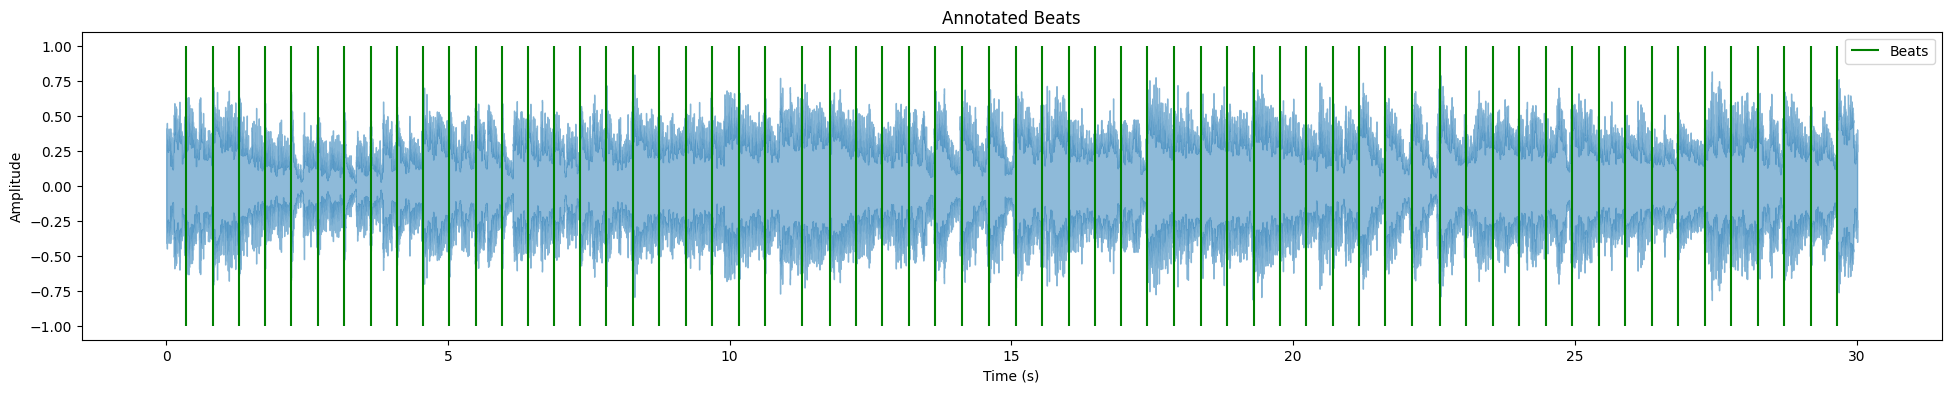

In [53]:
plot_annotated_beat("disco/disco.00033.wav", "gtzan_disco_00033.beats")

### Sonifying lowest accuracy blues tracks

In [ ]:
for index, row in df[df["Genre"] == "blues"].sort_values(by="F-measure_beat", ascending=True).head(25).iterrows():
    file_name = row['file_name']
    beats_path = row['beats_path']
    f1_score = row['F-measure_beat']
    print("---------------")
    print(f"File Name: {file_name}, Beats Path: {beats_path}, F-1 Score: {f1_score}")
    print("Annotated Beat:")
    display(sonify_beats(file_name, beats_path))
    print("Predicted Beat:")
    display(sonify_predicted_beat(file_name))
    print("---------------")

In [58]:
display(Audio(gtzan_audio_path + "blues/blues.00011.wav"))

In [61]:
df[df["file_name"] == "blues/blues.00011.wav"]

,Piece,Dataset,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat,Genre,Track,file_name,beats_path
11,gtzan/gtzan_blues_00011/track.npy,gtzan,0.510638,0.486735,0.0,0.0,0.666667,0.780174,0.0,0.958333,blues,00011,blues/blues.00011.wav,gtzan_blues_00011.beats
